## Data

In [1]:
from libs.paths import PATHS
from libs.pre_processing.training_data import read_data, train_test_split
from libs.pre_processing.pipeline import make_pipeline

Current directory: c:\Users\Alvaro Lima\My Files\Projects\automl-tcc\src
Source path found in current directory.


In [2]:
# Oversampling
from imblearn.over_sampling import SMOTE

smote = SMOTE(
    sampling_strategy=1,  
    k_neighbors=5,             
    random_state=42            
)

In [3]:
# Raw data
X, y = read_data(PATHS["ADULT_INCOME"], "income")

# map target variable to binary
y = y.map({"<=50K": 0, ">50K": 1})

X_train, X_test, y_train, y_test = train_test_split(
        X, y, test_size=0.3, random_state=42)

# Pre-processed data
pipeline = make_pipeline(X_train)
X_transformed = pipeline.fit_transform(X_train)
X_test_transformed = pipeline.transform(X_test)

# Balanced data
X_balanced, y_balanced = smote.fit_resample(X_transformed, y_train)

## TPOT

In [4]:
from tpot import TPOTClassifier

c:\Users\Alvaro Lima\miniconda3\envs\tpot\lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [5]:
from sklearn.metrics import classification_report, roc_auc_score

class ModelResults:
    automl: TPOTClassifier
    report: str
    roc_auc: float
    y_pred_proba: list

    def __init__(self, automl, report, roc_auc, y_pred_proba):
        self.automl = automl
        self.report = report
        self.roc_auc = roc_auc
        self.y_pred_proba = y_pred_proba

def run_automl(X, y, X_test = X_test):

    automl = TPOTClassifier(generations=5, 
                        population_size=20, 
                        random_state=42, 
                        max_time_mins=1, 
                        n_jobs=1,
                        )
    
    automl.fit(X, y)

    y_pred = automl.predict(X_test)
    y_pred_proba = automl.predict_proba(X_test)
    
    report = classification_report(y_test, y_pred)
    roc_auc = roc_auc_score(y_test, y_pred_proba[:, 1])
    
    return ModelResults(automl, report, roc_auc, y_pred_proba)

### Results

In [6]:
# Pre-processed data results
pp_results = run_automl(X_transformed, y_train, X_test_transformed)

c:\Users\Alvaro Lima\miniconda3\envs\tpot\lib\site-packages\tpot\tpot_estimator\estimator.py:456: UserWarning: Both generations and max_time_mins are set. TPOT will terminate when the first condition is met.
  warnings.warn("Both generations and max_time_mins are set. TPOT will terminate when the first condition is met.")
Generation:   0%|          | 0/5 [00:00<?, ?it/s]

KeyError: "None of [Index(['Eval Error'], dtype='object')] are in the [index]"

In [ ]:
print("Raw Data Results:")
print(pp_results.report)
print(f"ROC AUC: {pp_results.roc_auc:.4f}")

Best hyperparameters found:  {'n_estimators': 187, 'num_leaves': 19, 'min_child_samples': 4, 'learning_rate': np.float64(0.17402065726724145), 'log_max_bin': 8, 'colsample_bytree': np.float64(0.6649148062238498), 'reg_alpha': np.float64(0.006958608037974516), 'reg_lambda': np.float64(0.006761362450996487)}
Best model:  LGBMClassifier(colsample_bytree=np.float64(0.6649148062238498),
               learning_rate=np.float64(0.17402065726724145), max_bin=255,
               min_child_samples=4, n_estimators=187, n_jobs=-1, num_leaves=19,
               reg_alpha=np.float64(0.006958608037974516),
               reg_lambda=np.float64(0.006761362450996487), verbose=-1)
Best score:  (np.float64(0.07307997563115864), {'pred_time': 2.411226541875434e-06})
Raw Data Results:
              precision    recall  f1-score   support

       <=50K       0.91      0.94      0.92     11233
        >50K       0.78      0.68      0.73      3420

    accuracy                           0.88     14653
   macro

In [ ]:
# Balanced data results
balanced_results = run_automl(X_balanced, y_balanced, X_test_transformed)

c:\Users\Alvaro Lima\miniconda3\envs\flaml\Lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(
c:\Users\Alvaro Lima\miniconda3\envs\flaml\Lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(
c:\Users\Alvaro Lima\miniconda3\envs\flaml\Lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(
c:\Users\Alvaro Lima\miniconda3\envs\flaml\Lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(
c:\Users\Alvaro Lima\miniconda3\envs\flaml\Lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but LGBMCla

In [ ]:
print("Raw Data Results:")
print(balanced_results.report)
print(f"ROC AUC: {balanced_results.roc_auc:.4f}")

Best hyperparameters found:  {'n_estimators': 141, 'num_leaves': 247, 'min_child_samples': 2, 'learning_rate': np.float64(0.07154128424526202), 'log_max_bin': 9, 'colsample_bytree': np.float64(0.591579264701285), 'reg_alpha': np.float64(0.01435520144866301), 'reg_lambda': np.float64(0.006874802748054271)}
Best model:  LGBMClassifier(colsample_bytree=np.float64(0.591579264701285),
               learning_rate=np.float64(0.07154128424526202), max_bin=511,
               min_child_samples=2, n_estimators=141, n_jobs=-1, num_leaves=247,
               reg_alpha=np.float64(0.01435520144866301),
               reg_lambda=np.float64(0.006874802748054271), verbose=-1)
Best score:  (np.float64(0.02294312336665849), {'pred_time': 5.466022862849356e-06})
Raw Data Results:
              precision    recall  f1-score   support

       <=50K       0.91      0.92      0.92     11233
        >50K       0.73      0.71      0.72      3420

    accuracy                           0.87     14653
   macro a

### Curves

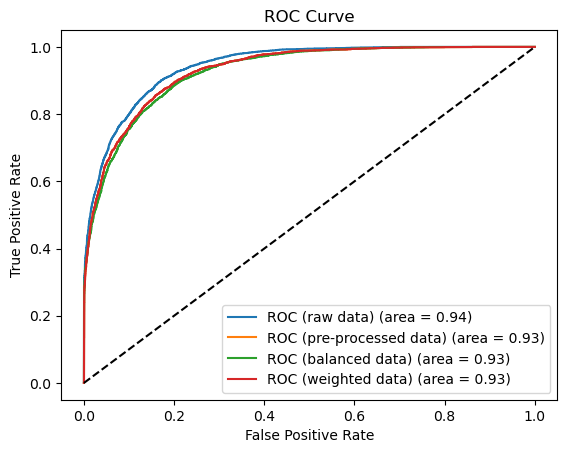

In [ ]:
from sklearn.metrics import roc_curve
import matplotlib.pyplot as plt

y_test_bin = (y_test == '>50K').astype(int)

# Plotando a curva ROC
fpr1, tpr1, thresholds1 = roc_curve(y_test_bin, raw_results.y_pred_proba[:, 1])
fpr2, tpr2, thresholds2 = roc_curve(y_test_bin, pp_results.y_pred_proba[:, 1])
fpr3, tpr3, thresholds3 = roc_curve(y_test_bin, balanced_results.y_pred_proba[:, 1])

plt.figure()
plt.plot(fpr1, tpr1, label=f'ROC (raw data) (area = {raw_results.roc_auc:.2f})')
plt.plot(fpr2, tpr2, label=f'ROC (pre-processed data) (area = {pp_results.roc_auc:.2f})')
plt.plot(fpr3, tpr3, label=f'ROC (balanced data) (area = {balanced_results.roc_auc:.2f})')
plt.plot([0, 1], [0, 1], 'k--') 
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend(loc="lower right")
plt.show()